In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from libs.plot import plot_clarke_error_grid, plot_hypo_metric, plot_distribution, plot_rmse

In [2]:
df = pd.read_csv('./samples/01.csv')
pred_glucose = np.array(df['pred'].values.tolist())
gt_glucose = np.array(df['gt'].values.tolist())

### Clarke Error Grid

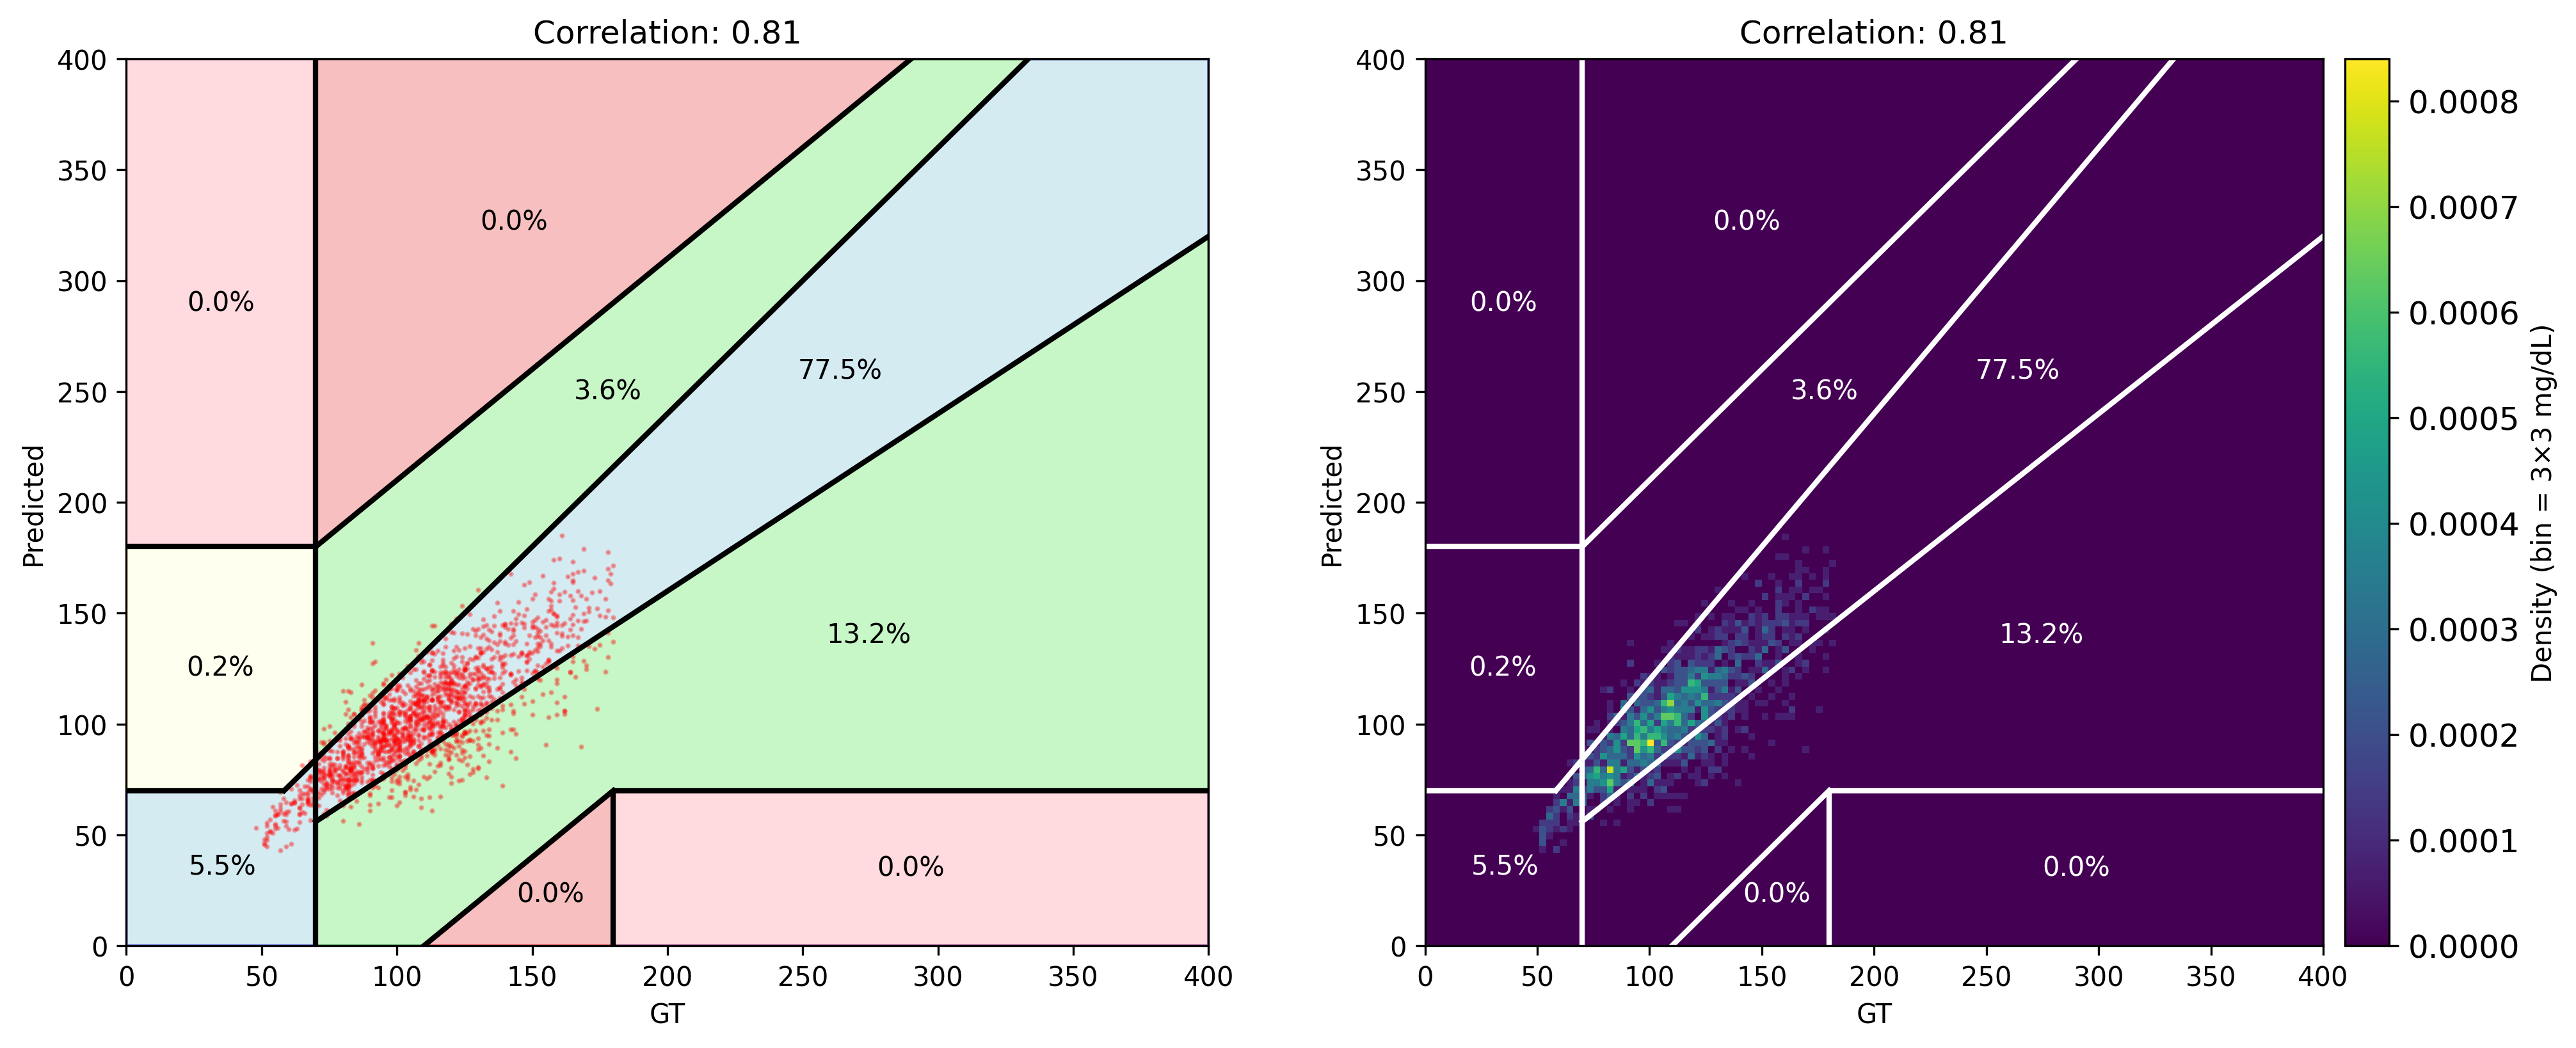

{'zone_a': 0.8306045340050378, 'zone_b': 0.16750629722921914, 'zone_c': 0.0, 'zone_d': 0.001889168765743073, 'zone_e': 0.0, 'out_of_bounds': 0.0, 'corr': 0.8118620575808962}


In [3]:
xmin, xmax = 0, 400
ymin, ymax = 0, 400

fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi=300)
clarke_score = plot_clarke_error_grid(ax[0], pred_glucose, gt_glucose, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, style='point')
ax[0].set_title(f"Correlation: {clarke_score['corr']:.2f}")

plot_clarke_error_grid(ax[1], pred_glucose, gt_glucose, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, style='heatmap', bin_size=3)
ax[1].set_title(f"Correlation: {clarke_score['corr']:.2f}")
plt.show()

print(clarke_score)

### Hypoglycemia Metric

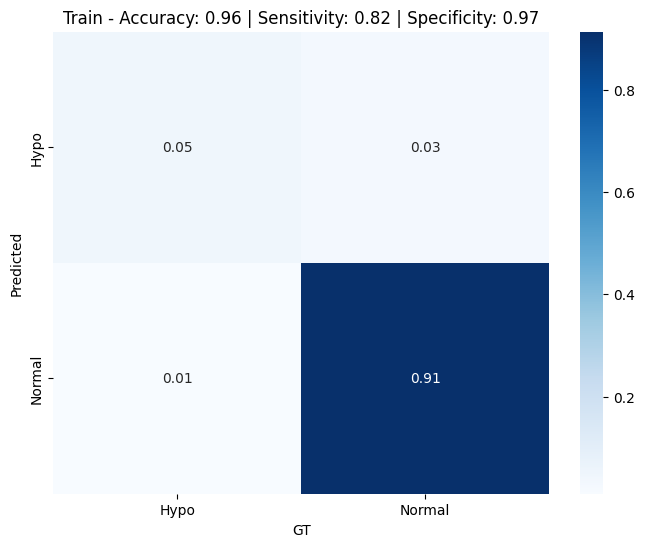

{'accuracy': 0.9609571788413098, 'sensitivity': 0.8241758241758241, 'specificity': 0.9692718770875084}


In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
hypo_score = plot_hypo_metric(ax, pred_glucose, gt_glucose)
plt.show()
print(hypo_score)

### Distribution

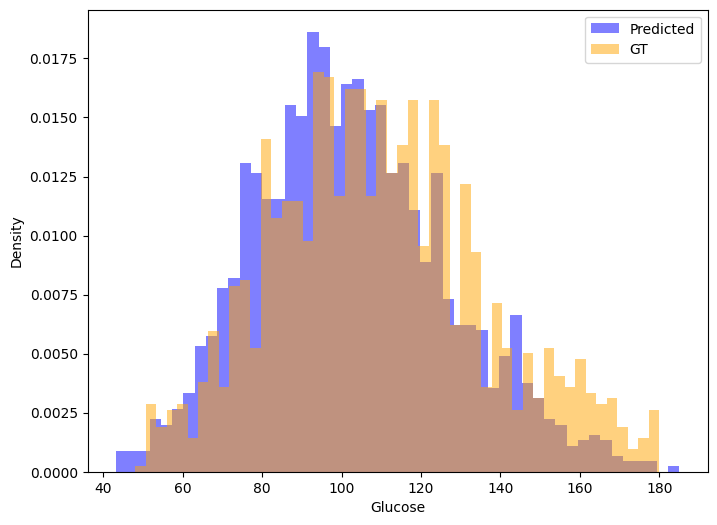

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_distribution(ax, pred_glucose, gt_glucose)
plt.show()

### RMSE

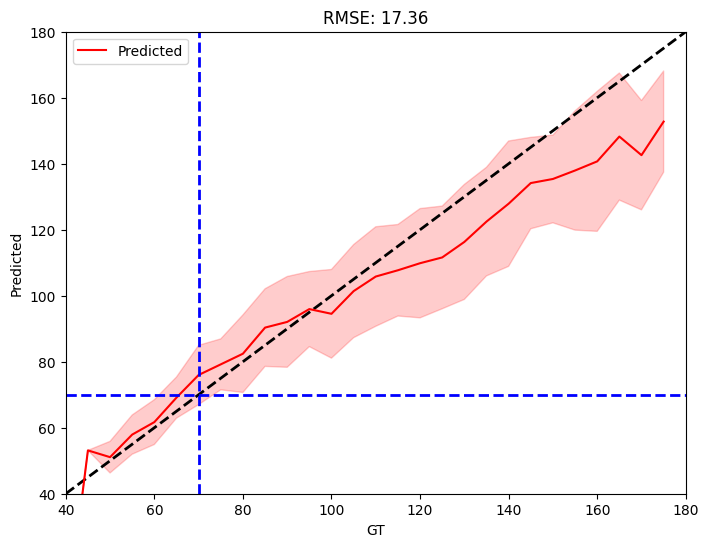

17.358326484891503


In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
rmse = plot_rmse(ax, pred_glucose, gt_glucose, xmin=40, xmax=180, ymin=40, ymax=180)
plt.show()
print(rmse)